# GRID SUPPLY POINT DATA EXPLORATION

This notebook carries out data exploration of a multiyear set of GSP data for particular GSP areas. GSP Areas are as shown in the table below:

| GSP Group | Area      | DN Owner Group  | DN Operator |
|:-----------:|:--------------------:|:-------------------------:|:----------------------------:|
| _ A | Eastern | UKPN | Eastern Power Networks|
| _ B | East Midlands | Western Pwr Dist | Western Pwr Dist (East Midlands)|
| _ C | London | UKPN | London Power Networks PLC|
| _ D | Mersey/N Wales | SPEN | SP MAnweb |
| _ E | Midlands | Western Pwr Dist | Western Pwr Dist (West Midlands) |
| _ F | Northern | Northern PwrGrid | Northern Pwrgrid (Northeast) |
| _ G | North Western | Electricity North West | Electricity North West |
| _ H | Southern | SSEN | Southern Elec Power Distr plc |
| _ J | Southern Eastern | UKPN | South Eastern Power Network |
| _ K | South Wales | Western Pwr Dist | Western Pwr Dist (South Wales) |
| _ L | South Western | Western Pwr Dist | Western Pwr Dist (South West) |
| _ M | Yorkshire | Northern Pwrgrid | Northern Pwrgrid (Yorkshire) |
| _ N | South Scotland | SPEN | SP Distribution |
| _ P | North Scotland | SSEN | Scottish Hydro Elec Pwr Distr |

GSP Areas are located throughout Great Britain as shown Below:

<img src='GSP_Area_Map.jpg' style='width:600px; height:600px;' />




In [1]:
#impot Libraries
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")

## Data Exploration of GSP Group N

In [2]:
#Load Data for GSP Area A
zf = zipfile.ZipFile("C:/Users/kevin/OneDrive/Documents/MSc Power and Energy Systems/MSc Project/Grid Supply Points/GSP_N_Clean.zip")
GSP_N = pd.read_csv(zf.open('GSP_N_Clean.csv'))

In [3]:
GSP_N.head()

,aggregation_date,estimate_indicator,gsp_group_id,gsp_id,import_export_indicator,message_type,abs_meter_volume,settlement_date,settlement_period,settlement_run_number,settlement_run_type,settlement_time,meter_timestamp,imp_exp_value,meter_volume
0,2011-04-21 00:00:00,F,_N,ABNELVF,E,IMP,0.016,20081227,1,23,DF,00:00,2008-12-27 00:00:00,-1,-0.016
1,2011-04-21 00:00:00,F,_N,ABNELVF,E,IMP,0.016,20081227,2,23,DF,00:30,2008-12-27 00:30:00,-1,-0.016
2,2011-04-21 00:00:00,F,_N,ABNELVF,E,IMP,0.016,20081227,3,23,DF,01:00,2008-12-27 01:00:00,-1,-0.016
3,2011-04-21 00:00:00,F,_N,ABNELVF,E,IMP,0.016,20081227,4,23,DF,01:30,2008-12-27 01:30:00,-1,-0.016
4,2011-04-21 00:00:00,F,_N,ABNELVF,E,IMP,0.016,20081227,5,23,DF,02:00,2008-12-27 02:00:00,-1,-0.016


In [4]:
# Convert dates back to timestamps and localize timestamp to GB to deal with clock change days.
GSP_N['aggregation_date'] = pd.to_datetime(GSP_N['aggregation_date'], format = '%Y-%m-%d')
GSP_N['meter_timestamp'] = pd.to_datetime(GSP_N['meter_timestamp'], format = '%Y-%m-%d %H:%M:%S')
GSP_N['norm_time'] = GSP_N['meter_timestamp'].dt.tz_localize('GB', ambiguous='infer')
GSP_N.drop('meter_timestamp', axis = 1, inplace = True)
GSP_N.rename(columns = {'norm_time': 'meter_timestamp'}, inplace = True)

In [5]:
GSP_N.head()

,aggregation_date,estimate_indicator,gsp_group_id,gsp_id,import_export_indicator,message_type,abs_meter_volume,settlement_date,settlement_period,settlement_run_number,settlement_run_type,settlement_time,imp_exp_value,meter_volume,meter_timestamp
0,2011-04-21,F,_N,ABNELVF,E,IMP,0.016,20081227,1,23,DF,00:00,-1,-0.016,2008-12-27 00:00:00+00:00
1,2011-04-21,F,_N,ABNELVF,E,IMP,0.016,20081227,2,23,DF,00:30,-1,-0.016,2008-12-27 00:30:00+00:00
2,2011-04-21,F,_N,ABNELVF,E,IMP,0.016,20081227,3,23,DF,01:00,-1,-0.016,2008-12-27 01:00:00+00:00
3,2011-04-21,F,_N,ABNELVF,E,IMP,0.016,20081227,4,23,DF,01:30,-1,-0.016,2008-12-27 01:30:00+00:00
4,2011-04-21,F,_N,ABNELVF,E,IMP,0.016,20081227,5,23,DF,02:00,-1,-0.016,2008-12-27 02:00:00+00:00


In [6]:
GSP_N.tail()

,aggregation_date,estimate_indicator,gsp_group_id,gsp_id,import_export_indicator,message_type,abs_meter_volume,settlement_date,settlement_period,settlement_run_number,settlement_run_type,settlement_time,imp_exp_value,meter_volume,meter_timestamp
15693501,2019-02-27,F,_N,WISH,I,GMP,20.520,20190225,44,1,II,21:30,1,20.520,2019-02-25 21:30:00+00:00
15693502,2019-02-27,F,_N,WISH,I,GMP,18.910,20190225,45,1,II,22:00,1,18.910,2019-02-25 22:00:00+00:00
15693503,2019-02-27,F,_N,WISH,I,GMP,18.310,20190225,46,1,II,22:30,1,18.310,2019-02-25 22:30:00+00:00
15693504,2019-02-27,F,_N,WISH,I,GMP,17.220,20190225,47,1,II,23:00,1,17.220,2019-02-25 23:00:00+00:00
15693505,2019-02-27,F,_N,WISH,I,GMP,15.935,20190225,48,1,II,23:30,1,15.935,2019-02-25 23:30:00+00:00


We see that the dataset appears to span 2008 to 2019

In [7]:
GSP_N.shape

(15693506, 15)

In [8]:
GSP_N.dtypes

aggregation_date               datetime64[ns]
estimate_indicator                     object
gsp_group_id                           object
gsp_id                                 object
import_export_indicator                object
message_type                           object
abs_meter_volume                      float64
settlement_date                         int64
settlement_period                       int64
settlement_run_number                   int64
settlement_run_type                    object
settlement_time                        object
imp_exp_value                           int64
meter_volume                          float64
meter_timestamp            datetime64[ns, GB]
dtype: object

### Column Descriptions:
- aggregration date: Date record was last updated
- estimate_indicator: Is record an estimate, T/F
- gsp_group_id: As per table 1
- gsp_id: Individual GSP name
- import_export_ indicator: I = Import, E = Export
- Message type
- abs_meter_volume: meter reading (absolute values) 
- settlement_date: date meter reading corresponds too
- settlement_period: 30 min blocks that each reading corresponds to
- settlement_run_number: Data are updated to correct errors
- settlelment_run_type: settlement type
- settlement_time: time of day converted from settlement period
- meter_timestamp: settlement_date and settlement_time combined
- imp_exp_value: 1 = Import, -1 = Export
- meter_volume: actual meter readings, positive for import, negative for export

In [9]:
GSP_N.describe()

,abs_meter_volume,settlement_date,settlement_period,settlement_run_number,imp_exp_value,meter_volume
count,1.569351e+07,1.569351e+07,1.569351e+07,1.569351e+07,1.569351e+07,1.569351e+07
mean,1.207943e+01,2.013670e+07,2.450023e+01,1.775492e+01,7.118464e-01,1.055886e+01
std,8.333718e+00,2.930842e+04,1.385379e+01,3.051795e+00,7.023352e-01,1.019186e+01
min,0.000000e+00,2.008123e+07,1.000000e+00,1.000000e+00,-1.000000e+00,-6.889000e+01
25%,6.035000e+00,2.011072e+07,1.300000e+01,1.800000e+01,1.000000e+00,4.435000e+00
50%,1.118600e+01,2.014022e+07,2.500000e+01,1.900000e+01,1.000000e+00,1.069200e+01
75%,1.707000e+01,2.016082e+07,3.700000e+01,1.900000e+01,1.000000e+00,1.667500e+01
max,6.889000e+01,2.019022e+07,5.000000e+01,2.300000e+01,1.000000e+00,6.019000e+01


In [10]:
GSP_N_Meters = pd.DataFrame(data = GSP_N.gsp_id.unique(), columns = ['gsp_name'])
GSP_N_Meters

,gsp_name
0,ABNELVF
1,AYRR
2,BAGA
3,BAIN
4,BERW
...,...
84,TOWH
85,WFIE
86,WGEO
87,WHHO


There are 89 Unique GSPs within GSP Area A. We can get more geographical information about these GSPs from National Grid GIS data.

In [11]:
GIS_DATA = pd.read_csv("C:/Users/kevin/OneDrive/Documents/MSc Power and Energy Systems/MSc Project/Grid Supply Points/gsp_gnode_directconnect_region_lookup.csv")
GIS_DATA.head()

,ng_id,ggd_id,gnode_id,gnode_name,gnode_lat,gnode_lon,gsp_id,gsp_name,gsp_lat,gsp_lon,dc_id,dc_name,dc_lat,dc_lon,region_id,region_name,has_pv,pes_id,pes_name
0,1,1,1.0,COWL,51.71105,-1.18901,1.0,COWL_1,51.71105,-1.18901,NaN,NaN,NaN,NaN,1.0,Cowley,1,20.0,_H
1,2,2,2.0,ECLA,51.92579,-0.90565,2.0,ECLA_1,51.92579,-0.90565,NaN,NaN,NaN,NaN,19.0,East Claydon,1,11.0,_B
2,3,3,3.0,ENDEDW,52.59726,-1.21548,3.0,ENDE_1,52.59726,-1.21548,NaN,NaN,NaN,NaN,20.0,Enderby,1,11.0,_B
3,4,4,4.0,GRENDW,52.24269,-0.72736,4.0,GREN_1,52.24269,-0.72736,NaN,NaN,NaN,NaN,21.0,Grendon,1,11.0,_B
4,5,5,5.0,RATS,52.86342,-1.25444,5.0,RATS_1,52.86342,-1.25444,NaN,NaN,NaN,NaN,22.0,Ratcliffe,1,11.0,_B


According to NG:
"This dataset also includes a lookup between GSPs and so-called Gnodes and Direct Connects. Gnodes are an entity used by teams within National Grid ESO for the purposes of modelling and monitoring the transmission network. In most cases there is a “ONE : ONE” relationship between “GSP : Gnode”, but occasionally a Gnode can represent several GSPs (“ONE Gnode : MANY GSPs”) and in some cases a Gnode represents an asset on the distribution network. In general, the relationship between GSPs and Gnodes is “MANY : MANY”. A Direct Connect represents demand connected directly to the transmission network. They are included in this dataset because they may theoretically host embedded generation and/or may form part of a MANY:MANY relationship with a Gnode."

In [12]:
# Get GIS data for GSPs in group GSP_A
GSP_N_Meters = pd.merge(GSP_N_Meters,GIS_DATA, on ='gsp_name', how='left')
GSP_N_Meters.head()

,gsp_name,ng_id,ggd_id,gnode_id,gnode_name,gnode_lat,gnode_lon,gsp_id,gsp_lat,gsp_lon,dc_id,dc_name,dc_lat,dc_lon,region_id,region_name,has_pv,pes_id,pes_name
0,ABNELVF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AYRR,165.0,165.0,165.0,AYRR,55.45746,-4.58795,165.0,55.45746,-4.58795,NaN,NaN,NaN,NaN,182.0,Ayr,1.0,18.0,_N
2,BAGA,167.0,167.0,167.0,BAGA,55.89992,-3.67308,167.0,55.89992,-3.67308,NaN,NaN,NaN,NaN,185.0,Bathgate,1.0,18.0,_N
3,BAIN,166.0,166.0,166.0,BAIN,56.01379,-3.76841,166.0,56.01379,-3.76841,NaN,NaN,NaN,NaN,184.0,Bainsford,1.0,18.0,_N
4,BERW,169.0,169.0,169.0,BERW,55.77749,-2.07909,169.0,55.77749,-2.07909,NaN,NaN,NaN,NaN,186.0,Berwick,1.0,18.0,_N


In [13]:
GSP_N_Meters.shape

(96, 19)

We see that there are 96 rows meaning that some GSPs belong to different gnodes and so there are multiple rows for these. This group does not contain any direct connects and some GSPs do not have any GIS data available. (These could be old GSPs)

In [14]:
#create a dataframe without dc and rows without GIS data:
GSP_N_loc = GSP_N_Meters.drop(labels = ['dc_id','dc_name', 'dc_lat','dc_lon'], axis = 1)
GSP_N_loc.dropna(axis = 0, inplace = True)
GSP_N_loc.head()

,gsp_name,ng_id,ggd_id,gnode_id,gnode_name,gnode_lat,gnode_lon,gsp_id,gsp_lat,gsp_lon,region_id,region_name,has_pv,pes_id,pes_name
1,AYRR,165.0,165.0,165.0,AYRR,55.45746,-4.58795,165.0,55.45746,-4.58795,182.0,Ayr,1.0,18.0,_N
2,BAGA,167.0,167.0,167.0,BAGA,55.89992,-3.67308,167.0,55.89992,-3.67308,185.0,Bathgate,1.0,18.0,_N
3,BAIN,166.0,166.0,166.0,BAIN,56.01379,-3.76841,166.0,56.01379,-3.76841,184.0,Bainsford,1.0,18.0,_N
4,BERW,169.0,169.0,169.0,BERW,55.77749,-2.07909,169.0,55.77749,-2.07909,186.0,Berwick,1.0,18.0,_N
5,BONN,171.0,171.0,171.0,BONNDW,56.00791,-3.86196,171.0,56.00791,-3.86196,187.0,Bonnybridge,1.0,18.0,_N


### Display GSP locations
We can display these locations on a map

In [15]:
# used for visualising geo-spatial data
import folium

In [16]:
uk_map = folium.Map(location = [55.3617609, -3.4433238], zoom_start = 6)
# instantiate a feature group for the gsp locations in the dataframe
locations = folium.map.FeatureGroup()

# loop through the GSP_A_loc and add each to the locations to feature group
for lat, lng, in zip(GSP_N_loc.gsp_lat, GSP_N_loc.gsp_lon):
    locations.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(GSP_N_loc.gsp_lat)
longitudes = list(GSP_N_loc.gsp_lon)
labels = list(GSP_N_loc.gsp_name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(uk_map)    
    
# add locations to map
uk_map.add_child(locations)


### Data Exploration/ Visualisation
We see that some GSPs are gregraphically close. We can examine some time series plots of these meters.
This GSP area is operated by Scottish Power Energy Networks, SP Distribution. As expected there are larger concentrations of GSPs around the cities of Glasgow and Edinburgh. This area is less densely populated that the major cities in England and also has significant wind resources. A Distribution Generation Heat Map can be found at [SP Distribution DG Heat Map][1]. Other useful documentation include:

- [SP Transmission Historical Energy Trends][2]
- [SP Distribution Future Energy Scenarios][3]
- [SP Distribution FES Key Findings][4]
- [SPEN SWRR][5]

Using these resources we can get an idea of groups of GSPs that:

1. Have Generation Connected
2. Are network constraint
3. Are in dense populated areas or not



[1]:(https://www.spenergynetworks.co.uk/pages/sp_distribution_heat_maps.aspx)
[2]:(https://www.spenergynetworks.co.uk/userfiles/file/SPEN_Energy_Trends_Report.pdf)
[3]:(https://www.spenergynetworks.co.uk/userfiles/file/SPD_DFES_-_Main_report.pdf)
[4]:(https://www.spenergynetworks.co.uk/userfiles/file/SPD_DFES_-_Key_findings.pdf)
[5]:(https://www.spenergynetworks.co.uk/pages/system_wide_resource_register.aspx)



In [17]:
GLNI = GSP_N.loc[GSP_N['gsp_id']=='GLNI']
GLNI.head()

,aggregation_date,estimate_indicator,gsp_group_id,gsp_id,import_export_indicator,message_type,abs_meter_volume,settlement_date,settlement_period,settlement_run_number,settlement_run_type,settlement_time,imp_exp_value,meter_volume,meter_timestamp
7495202,2011-04-21,F,_N,GLNI,I,GMP,7.850,20081227,1,23,DF,00:00,1,7.850,2008-12-27 00:00:00+00:00
7495203,2011-04-21,F,_N,GLNI,I,GMP,8.085,20081227,2,23,DF,00:30,1,8.085,2008-12-27 00:30:00+00:00
7495204,2011-04-21,F,_N,GLNI,I,GMP,7.560,20081227,3,23,DF,01:00,1,7.560,2008-12-27 01:00:00+00:00
7495205,2011-04-21,F,_N,GLNI,I,GMP,7.165,20081227,4,23,DF,01:30,1,7.165,2008-12-27 01:30:00+00:00
7495206,2011-04-21,F,_N,GLNI,I,GMP,6.925,20081227,5,23,DF,02:00,1,6.925,2008-12-27 02:00:00+00:00


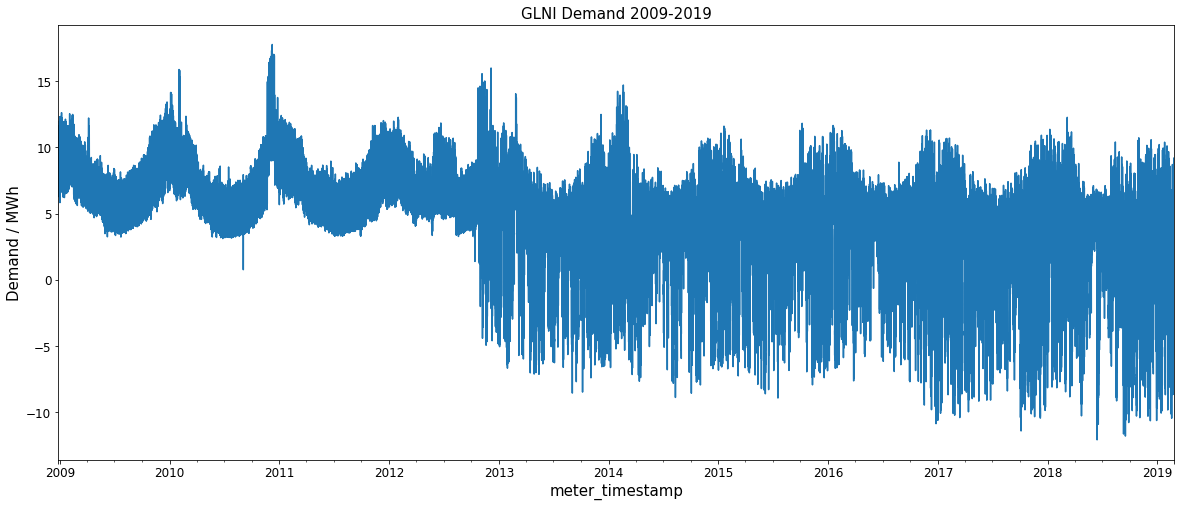

In [39]:
GLNI.plot(kind = 'line', x = 'meter_timestamp', y = 'meter_volume', figsize = (20,8), legend = None, fontsize = 12)
plt.title('GLNI Demand 2009-2019',fontsize = 15)
plt.ylabel('Demand / MWh', fontsize =15)
plt.xlabel('meter_timestamp', fontsize =15)
plt.show()

We can also view the net demand per year

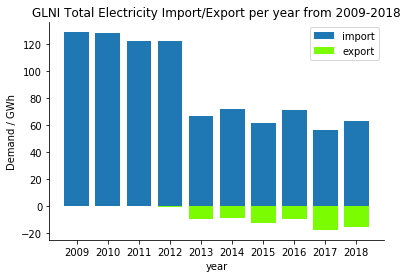

In [40]:
GLNI_IMP = GLNI[['meter_timestamp','meter_volume']].loc[GLNI['import_export_indicator']=='I']
GLNI_IMP['year'] = GLNI_IMP['meter_timestamp'].dt.year
GLNI_IMP_YR = GLNI_IMP.groupby('year').sum()
GLNI_IMP_YR = GLNI_IMP_YR/1000
GLNI_IMP_YR.drop([2008,2019], inplace = True)

GLNI_EXP = GLNI[['meter_timestamp','meter_volume']].loc[GLNI['import_export_indicator']=='E']
GLNI_EXP['year'] = GLNI_EXP['meter_timestamp'].dt.year
GLNI_EXP_YR = GLNI_EXP.groupby('year').sum()
GLNI_EXP_YR = GLNI_EXP_YR/1000
GLNI_EXP_YR.drop([2019], inplace = True)

fig, ax = plt.subplots()
imports = ax.bar(GLNI_IMP_YR.index,GLNI_IMP_YR['meter_volume'], label  = 'import')
exports = ax.bar(GLNI_EXP_YR.index,GLNI_EXP_YR['meter_volume'], label = 'export', color = 'lawngreen')
ax.set_xticks(GLNI_IMP_YR.index)
ax.set_xticklabels(GLNI_IMP_YR.index)
ax.set_xlabel('year')
ax.set_ylabel('Demand / GWh')
ax.set_title('GLNI Total Electricity Import/Export per year from 2009-2018')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

plt.show()

In [20]:
GLNI_EXP_YR

,meter_volume
year,
2012,-0.661795
2013,-9.630170
2014,-8.610065
2015,-12.599115
2016,-9.494760
2017,-17.646895
2018,-15.645915


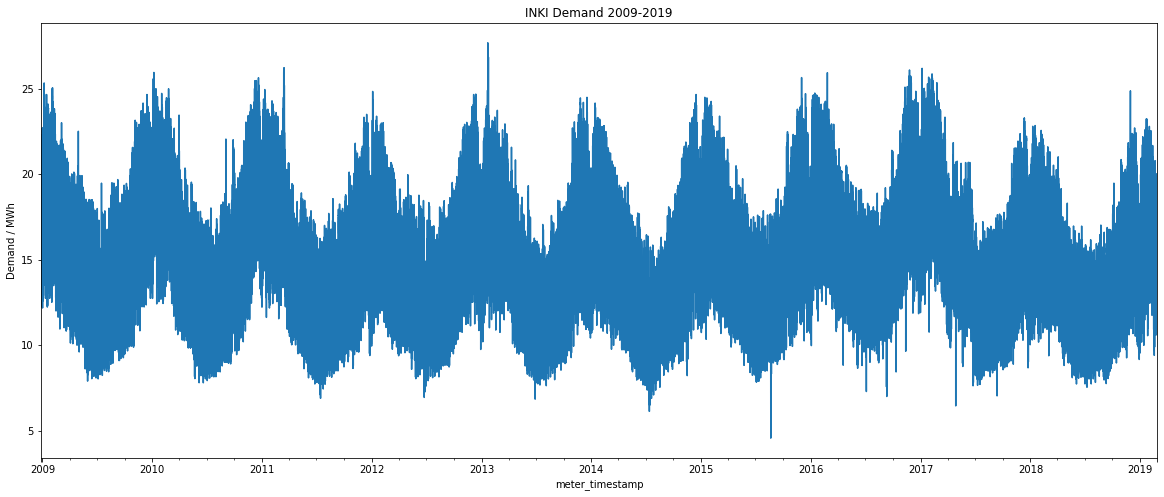

In [21]:
INKE = GSP_N.loc[GSP_N['gsp_id']=='INKE']
INKE.plot(kind = 'line', x = 'meter_timestamp', y = 'meter_volume', figsize = (20,8), legend = None)
plt.title('INKI Demand 2009-2019')
plt.ylabel('Demand / MWh')
plt.show()

We can see that GLNI GSP which had onshore windfarms connected in 2012 having more substantial exports. While INKE GSP which has traditional fossil fuel maintains a typical demand profile with near constant levels of demand

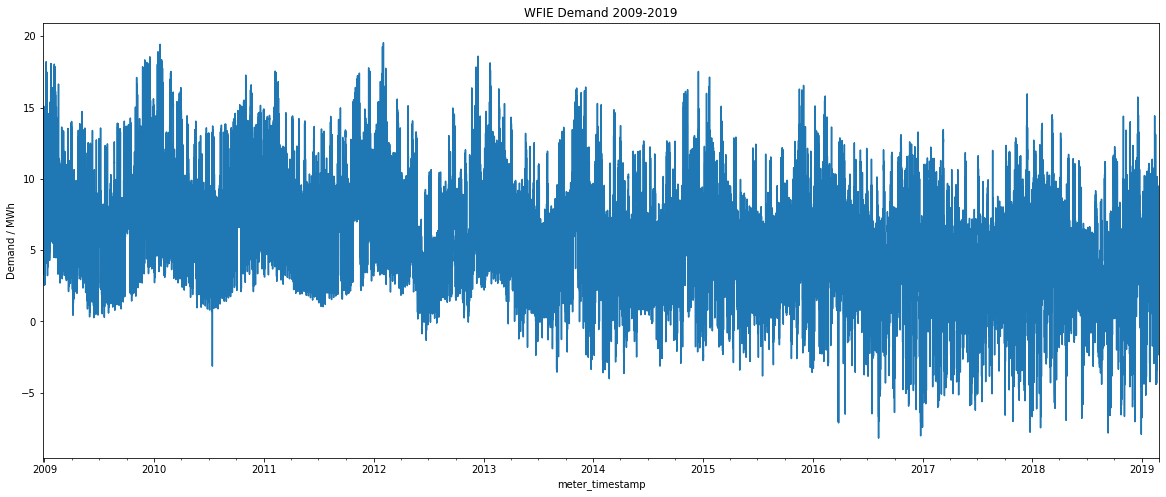

In [22]:
WFIE = GSP_N.loc[GSP_N['gsp_id']=='WFIE']
WFIE.plot(kind = 'line', x = 'meter_timestamp', y = 'meter_volume', figsize = (20,8), legend = None)
plt.title('WFIE Demand 2009-2019')
plt.ylabel('Demand / MWh')
plt.show()

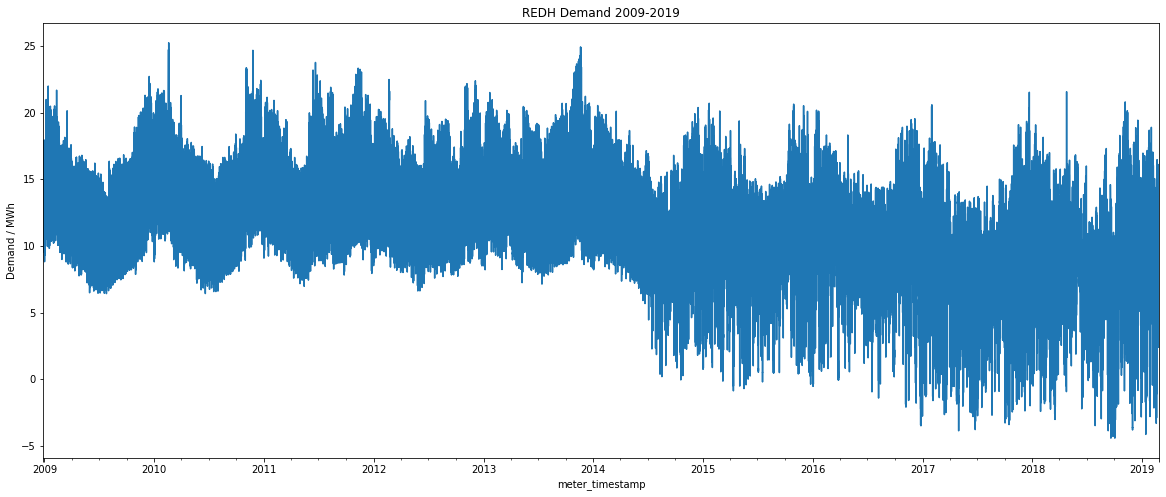

In [23]:
REDH = GSP_N.loc[GSP_N['gsp_id']=='REDH']
REDH.plot(kind = 'line', x = 'meter_timestamp', y = 'meter_volume', figsize = (20,8), legend = None)
plt.title('REDH Demand 2009-2019')
plt.ylabel('Demand / MWh')
plt.show()

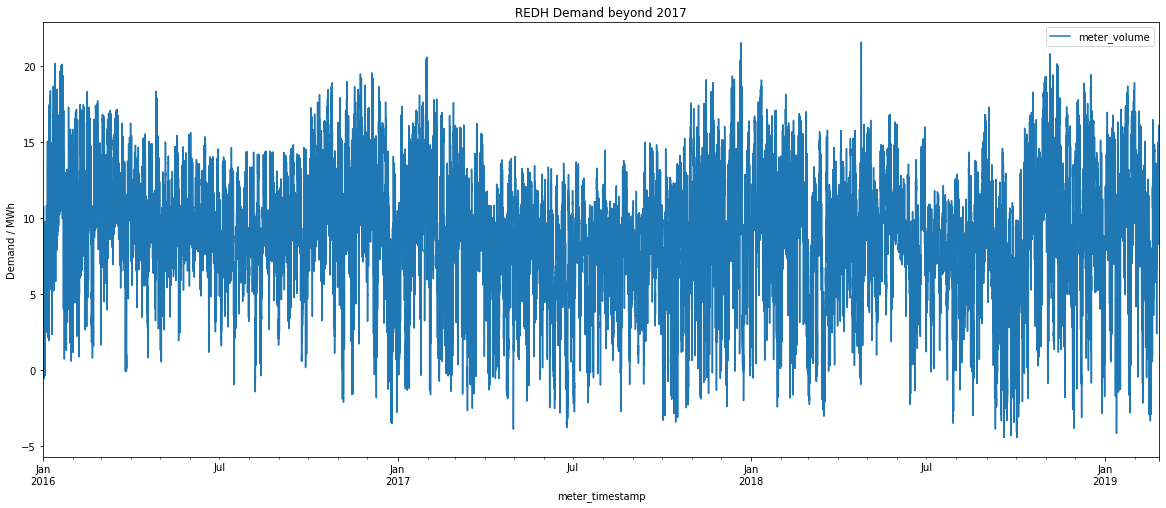

In [24]:
REDH.loc[(REDH['meter_timestamp'].dt.year > 2015)].plot(kind = 'line',
                                                              x = 'meter_timestamp',
                                                              y = 'meter_volume', 
                                                              figsize = (20,8)) 
plt.title('REDH Demand beyond 2017')
plt.ylabel('Demand / MWh')
plt.show()

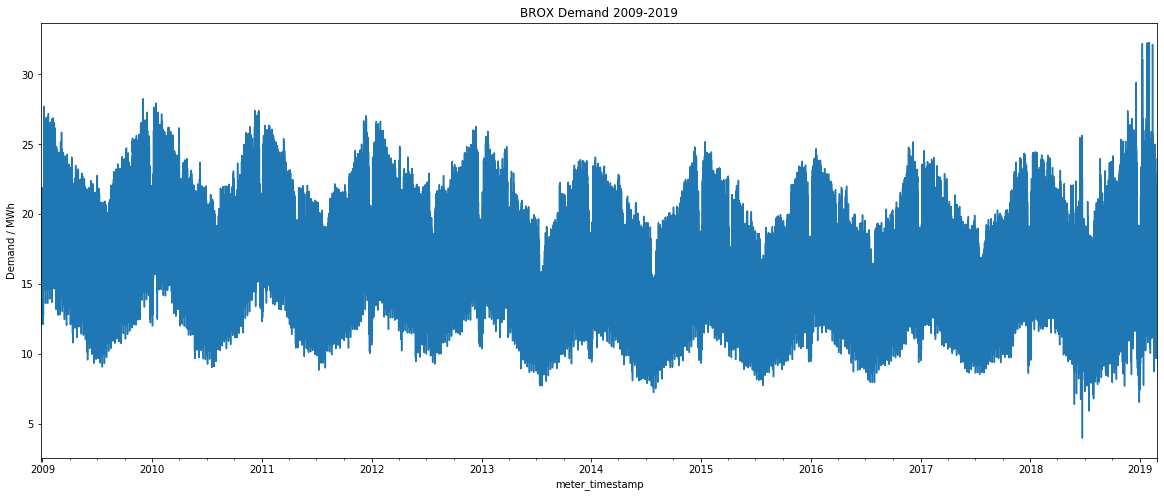

In [25]:
BROX = GSP_N.loc[GSP_N['gsp_id']=='BROX']
BROX.plot(kind = 'line', x = 'meter_timestamp', y = 'meter_volume', figsize = (20,8), legend = None)
plt.title('BROX Demand 2009-2019')
plt.ylabel('Demand / MWh')
plt.show()

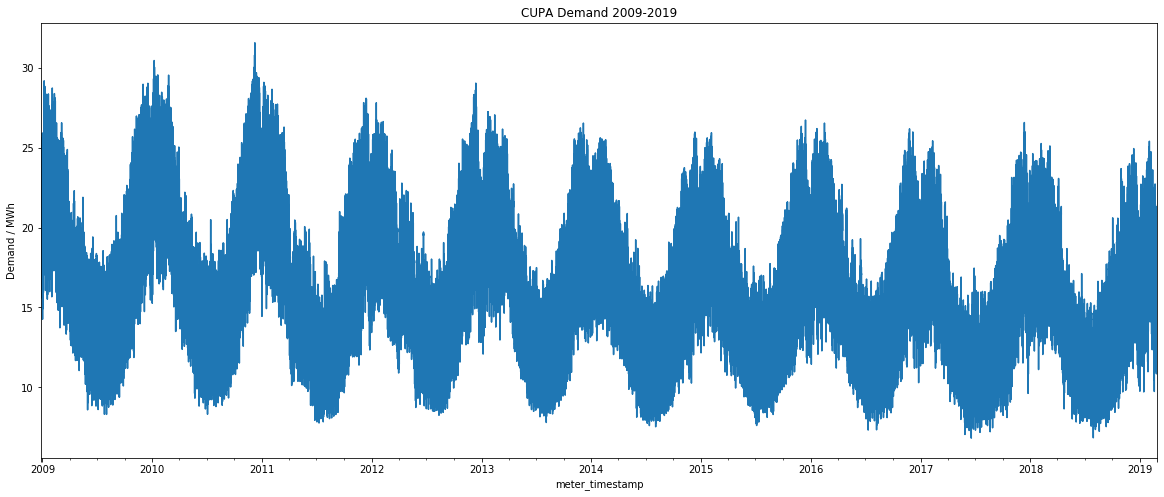

In [26]:
CUPA = GSP_N.loc[GSP_N['gsp_id']=='CUPA']
CUPA.plot(kind = 'line', x = 'meter_timestamp', y = 'meter_volume', figsize = (20,8), legend = None)
plt.title('CUPA Demand 2009-2019')
plt.ylabel('Demand / MWh')
plt.show()

In [27]:
CROO = GSP_N.loc[GSP_N['gsp_id']=='CROO']
PAIS = GSP_N.loc[GSP_N['gsp_id']=='PAIS']
ELDE = GSP_N.loc[GSP_N['gsp_id']=='ELDE']
JOHN = GSP_N.loc[GSP_N['gsp_id']=='JOHN']

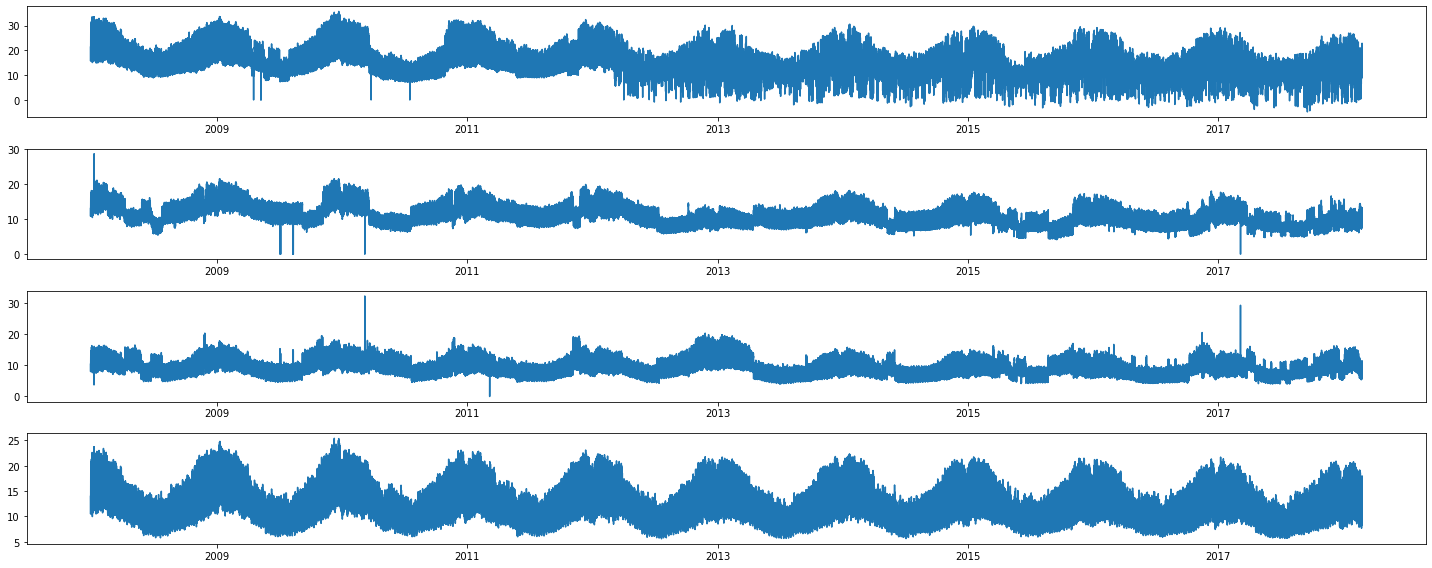

In [28]:
pd.plotting.register_matplotlib_converters()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (20,8))
ax1.plot(CROO.meter_timestamp, CROO.meter_volume, label = 'CROO')
ax2.plot(PAIS.meter_timestamp, PAIS.meter_volume)
ax3.plot(ELDE.meter_timestamp, ELDE.meter_volume)
ax4.plot(JOHN.meter_timestamp, JOHN.meter_volume)
plt.tight_layout()

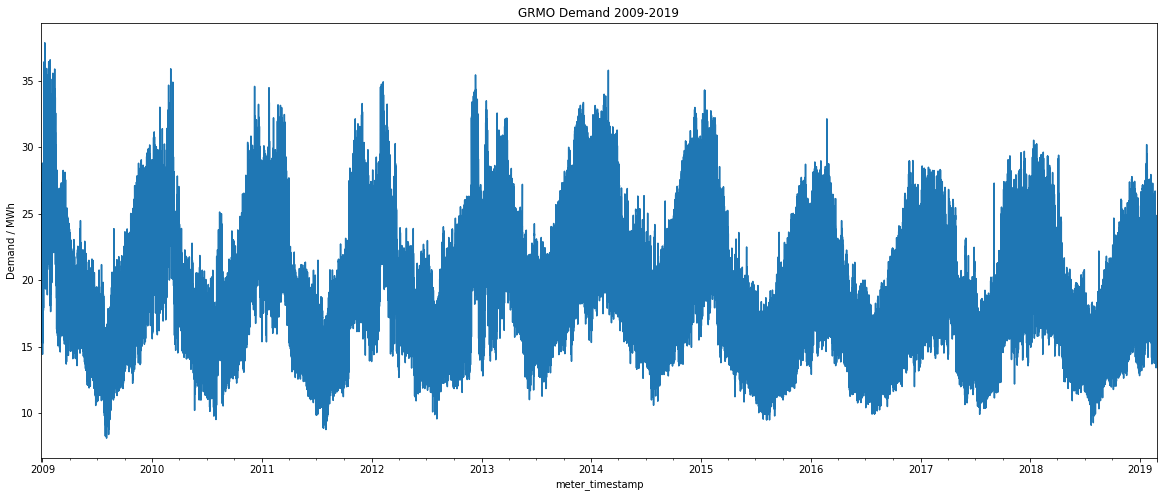

In [29]:
GRMO = GSP_N.loc[GSP_N['gsp_id']=='GRMO']
GRMO.plot(kind = 'line', x = 'meter_timestamp', y = 'meter_volume', figsize = (20,8), legend = None)
plt.title('GRMO Demand 2009-2019')
plt.ylabel('Demand / MWh')
plt.show()

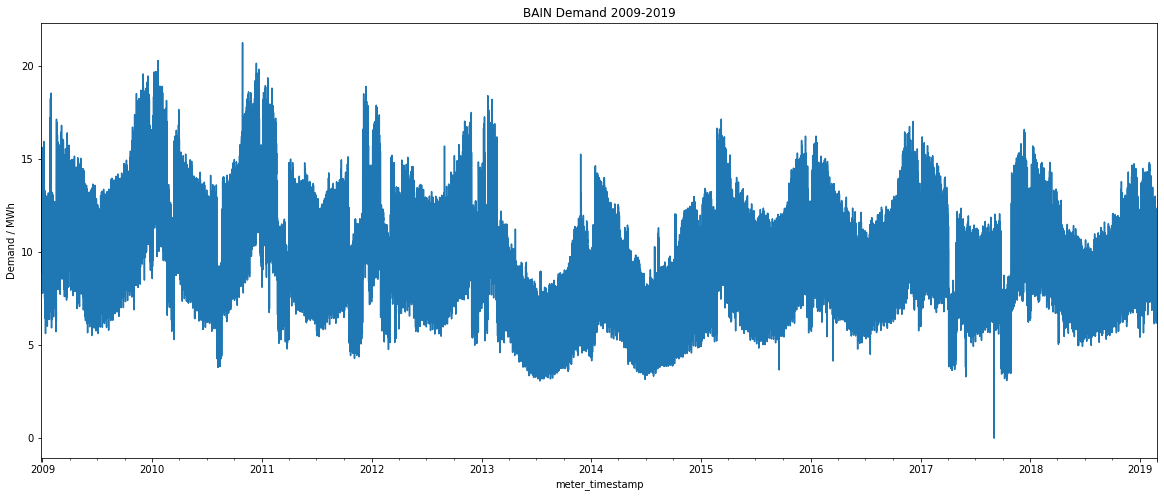

In [30]:
BAIN = GSP_N.loc[GSP_N['gsp_id']=='BAIN']
BAIN.plot(kind = 'line', x = 'meter_timestamp', y = 'meter_volume', figsize = (20,8), legend = None)
plt.title('BAIN Demand 2009-2019')
plt.ylabel('Demand / MWh')
plt.show()

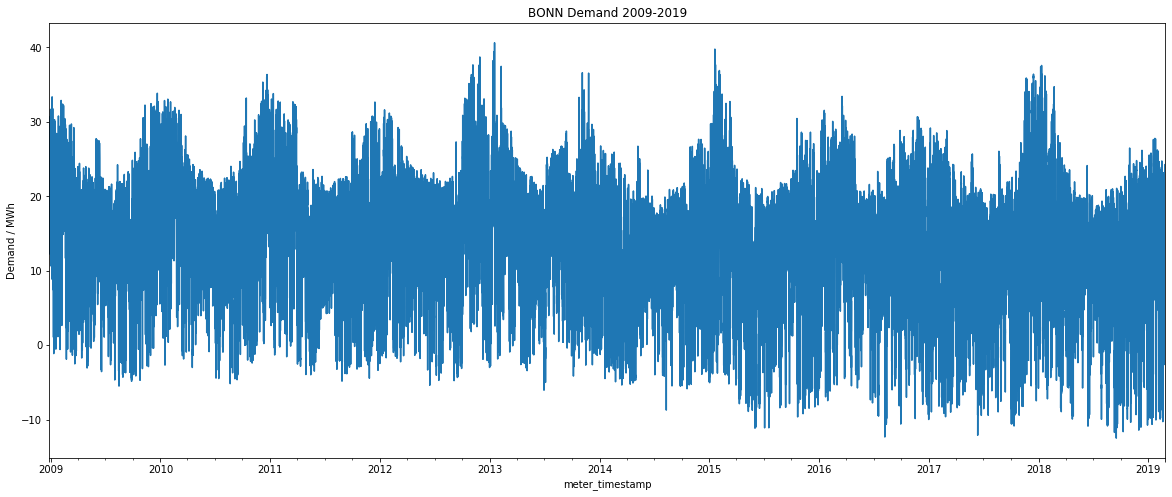

In [31]:
BONN = GSP_N.loc[GSP_N['gsp_id']=='BONN']
BONN.plot(kind = 'line', x = 'meter_timestamp', y = 'meter_volume', figsize = (20,8), legend = None)
plt.title('BONN Demand 2009-2019')
plt.ylabel('Demand / MWh')
plt.show()

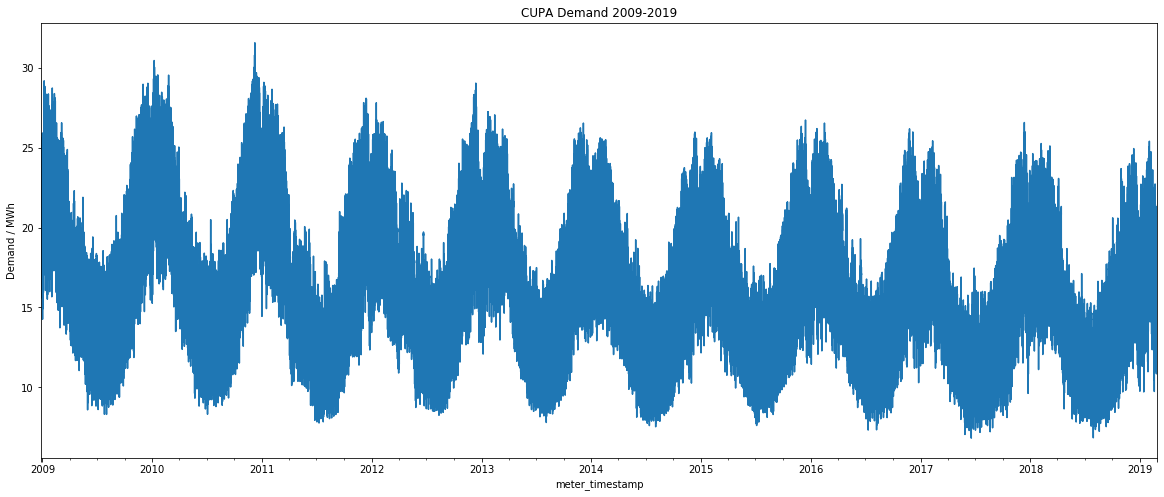

In [32]:
CUPA = GSP_N.loc[GSP_N['gsp_id']=='CUPA']
CUPA.plot(kind = 'line', x = 'meter_timestamp', y = 'meter_volume', figsize = (20,8), legend = None)
plt.title('CUPA Demand 2009-2019')
plt.ylabel('Demand / MWh')
plt.show()

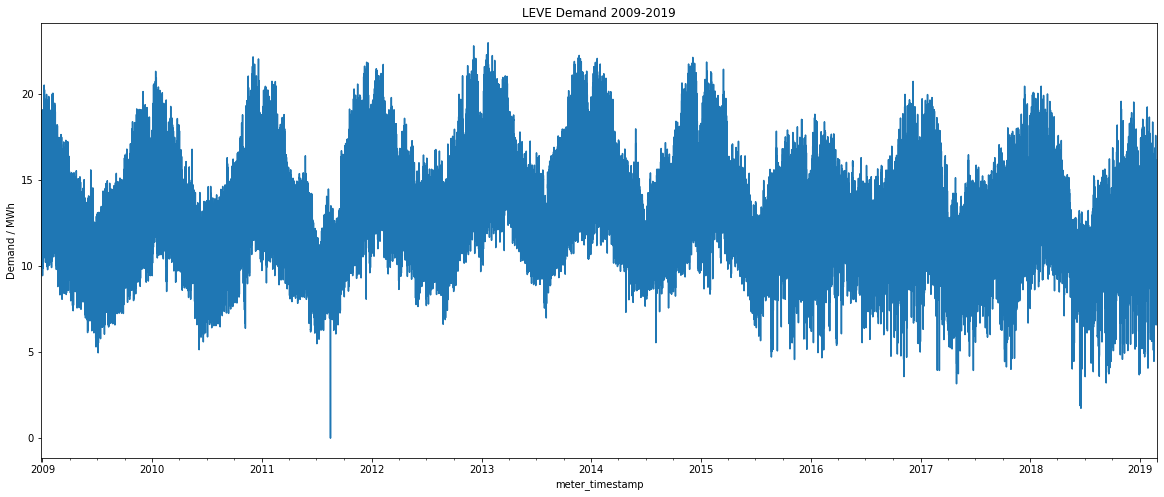

In [33]:
LEVE = GSP_N.loc[GSP_N['gsp_id']=='LEVE']
LEVE.plot(kind = 'line', x = 'meter_timestamp', y = 'meter_volume', figsize = (20,8), legend = None)
plt.title('LEVE Demand 2009-2019')
plt.ylabel('Demand / MWh')
plt.show()

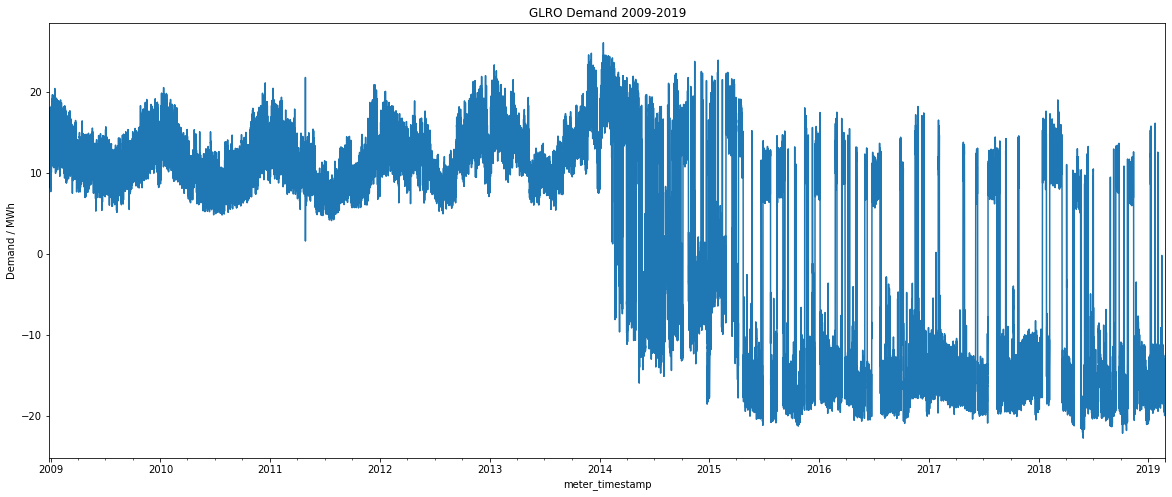

In [34]:
GLRO = GSP_N.loc[GSP_N['gsp_id']=='GLRO']
GLRO.plot(kind = 'line', x = 'meter_timestamp', y = 'meter_volume', figsize = (20,8), legend = None)
plt.title('GLRO Demand 2009-2019')
plt.ylabel('Demand / MWh')
plt.show()

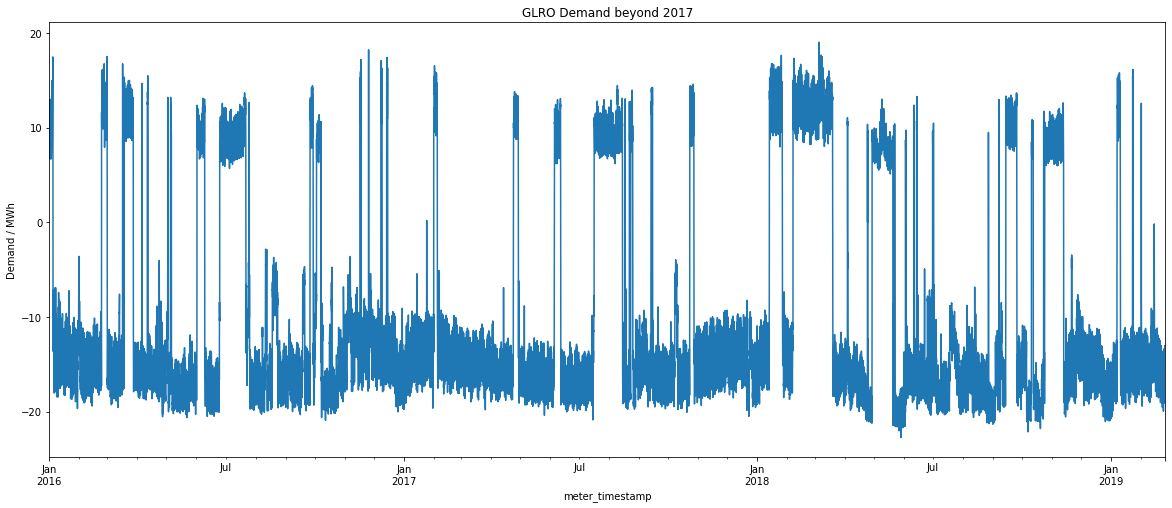

In [35]:
GLRO.loc[(GLRO['meter_timestamp'].dt.year > 2015)].plot(kind = 'line',
                                                              x = 'meter_timestamp',
                                                              y = 'meter_volume', 
                                                              figsize = (20,8), legend = None) 
plt.title('GLRO Demand beyond 2017')
plt.ylabel('Demand / MWh')
plt.show()

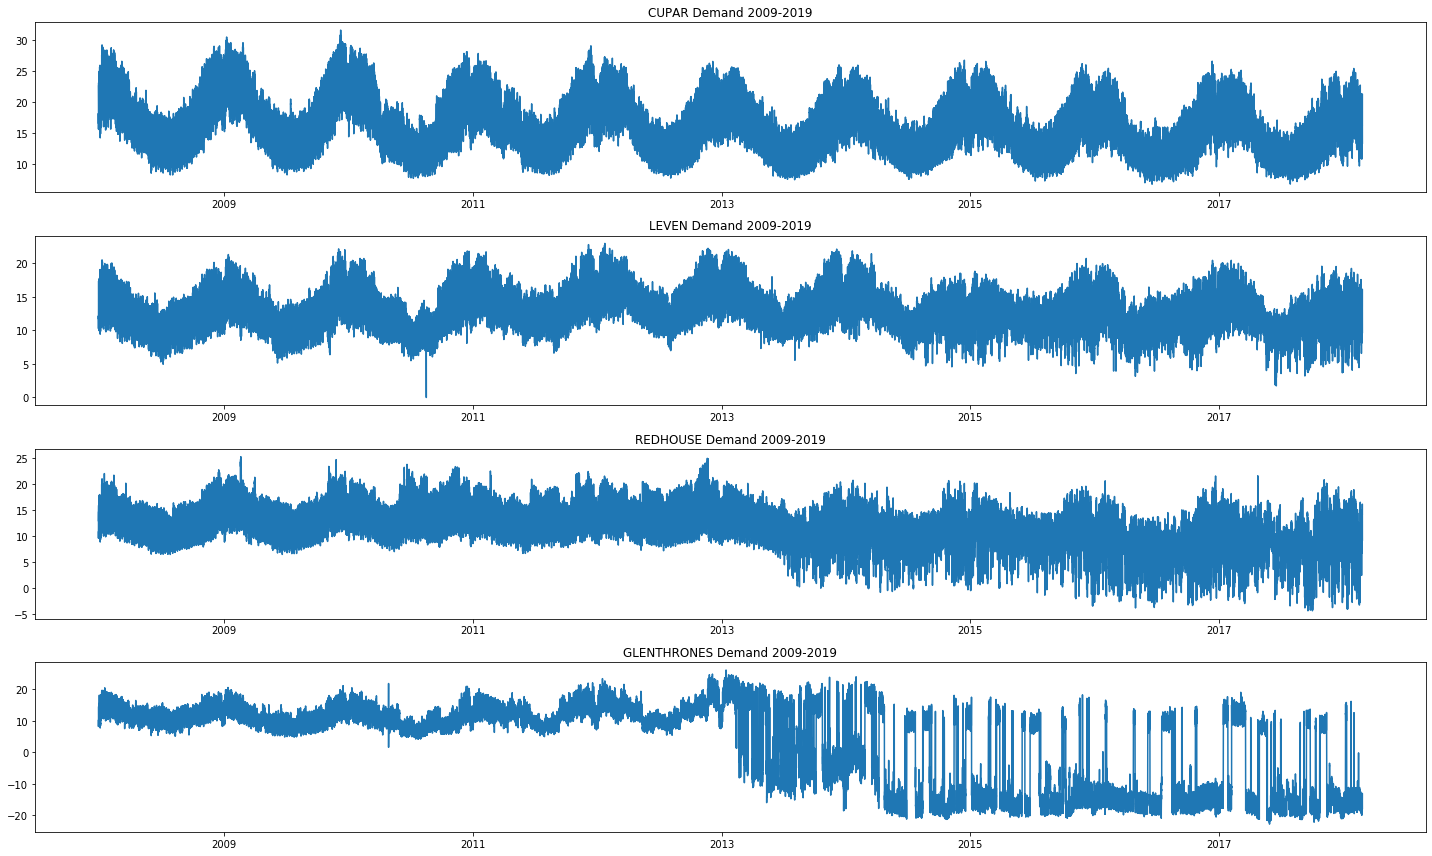

In [36]:
pd.plotting.register_matplotlib_converters()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (20,12))
ax1.plot(CUPA.meter_timestamp, CUPA.meter_volume )
ax2.plot(LEVE.meter_timestamp, LEVE.meter_volume)
ax3.plot(REDH.meter_timestamp, REDH.meter_volume)
ax4.plot(GLRO.meter_timestamp, GLRO.meter_volume)

ax1.set_title('CUPAR Demand 2009-2019')
ax2.set_title('LEVEN Demand 2009-2019')
ax3.set_title('REDHOUSE Demand 2009-2019')
ax4.set_title('GLENTHRONES Demand 2009-2019')

plt.tight_layout()
plt.savefig('N.jpg')

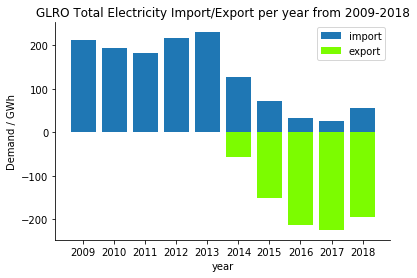

In [37]:
GLRO_IMP = GLRO[['meter_timestamp','meter_volume']].loc[GLRO['import_export_indicator']=='I']
GLRO_IMP['year'] = GLRO_IMP['meter_timestamp'].dt.year
GLRO_IMP_YR = GLRO_IMP.groupby('year').sum()
GLRO_IMP_YR = GLRO_IMP_YR/1000
GLRO_IMP_YR.drop([2008,2019], inplace = True)

GLRO_EXP = GLRO[['meter_timestamp','meter_volume']].loc[GLRO['import_export_indicator']=='E']
GLRO_EXP['year'] = GLRO_EXP['meter_timestamp'].dt.year
GLRO_EXP_YR = GLRO_EXP.groupby('year').sum()
GLRO_EXP_YR = GLRO_EXP_YR/1000
GLRO_EXP_YR.drop([2019], inplace = True)

fig, ax = plt.subplots()
imports = ax.bar(GLRO_IMP_YR.index,GLRO_IMP_YR['meter_volume'], label  = 'import')
exports = ax.bar(GLRO_EXP_YR.index,GLRO_EXP_YR['meter_volume'], label = 'export', color = 'lawngreen')
ax.set_xticks(GLRO_IMP_YR.index)
ax.set_xticklabels(GLRO_IMP_YR.index)
ax.set_xlabel('year')
ax.set_ylabel('Demand / GWh')
ax.set_title('GLRO Total Electricity Import/Export per year from 2009-2018')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

plt.show()